In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
# start = "2010-01-01"
# end = "2023-12-31"

# df=data.DataReader('AAPL', 'yahoo' , start , end)
df = yf.download("AAPL", start="2010-01-01", end="2023-04-01")
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [4]:
df=df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


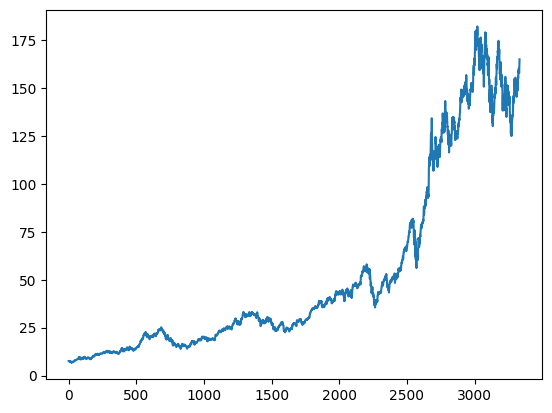

In [5]:
plt.plot(df.Close)

In [6]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3329    144.606099
3330    144.676099
3331    144.833499
3332    145.068299
3333    145.333499
Name: Close, Length: 3334, dtype: float64

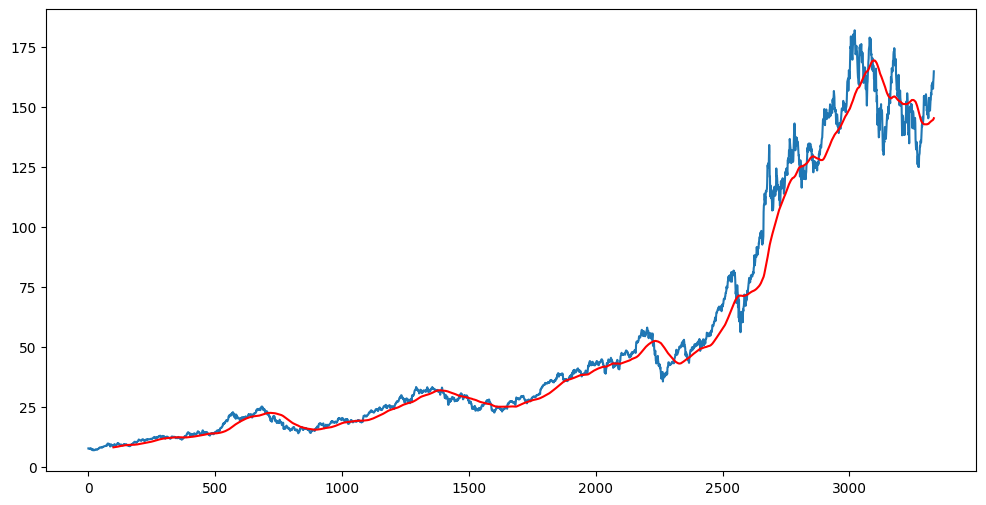

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3329    147.991900
3330    148.066950
3331    148.185149
3332    148.337549
3333    148.498249
Name: Close, Length: 3334, dtype: float64

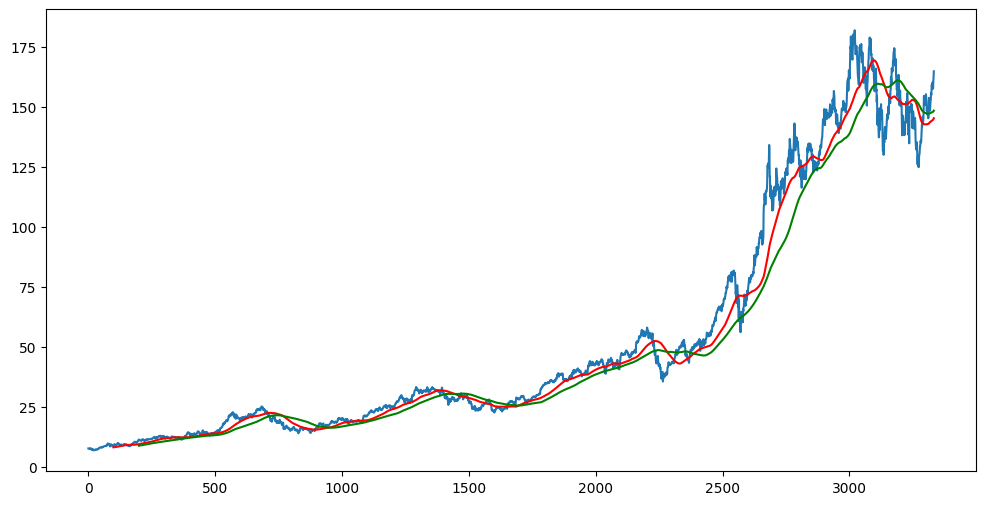

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(3334, 5)

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3334, 1)
(1001, 1)


In [12]:
data_testing.head()

,Close
2333,49.737499
2334,49.717499
2335,49.807499
2336,49.812500
2337,50.782501


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.87873331],
       [0.88781117],
       [0.90231289]])

In [15]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
102/102 [==============================] - 52s 420ms/step - loss: 0.0207
Epoch 2/50
102/102 [==============================] - 42s 415ms/step - loss: 0.0053
Epoch 3/50
102/102 [==============================] - 43s 418ms/step - loss: 0.0060
Epoch 4/50
102/102 [==============================] - 42s 414ms/step - loss: 0.0043
Epoch 5/50
102/102 [==============================] - 44s 426ms/step - loss: 0.0041
Epoch 6/50
102/102 [==============================] - 43s 422ms/step - loss: 0.0032
Epoch 7/50
102/102 [==============================] - 44s 430ms/step - loss: 0.0045
Epoch 8/50
102/102 [==============================] - 46s 448ms/step - loss: 0.0032
Epoch 9/50
102/102 [==============================] - 46s 451ms/step - loss: 0.0031
Epoch 10/50
102/102 [==============================] - 47s 458ms/step - loss: 0.0030
Epoch 11/50
102/102 [==============================] - 45s 443ms/step - loss: 0.0030
Epoch 12/50
102/102 [==============================] - 45s 441ms/step - lo

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
2333,49.737499
2334,49.717499
2335,49.807499
2336,49.812500
2337,50.782501


In [22]:
past_100_days = data_training.tail(100)

In [23]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21856\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [24]:
input_data = scaler.fit_transform(final_df)

In [25]:
input_data.shape

(1101, 1)

In [26]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


In [27]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1001, 100, 1)
(1001,)


In [28]:
y_predict = model.predict(x_test)

32/32 [==============================] - 5s 132ms/step


In [29]:
y_predict.shape

(1001, 1)

In [30]:
y_test

array([0.04623787, 0.04609365, 0.04674261, ..., 0.84684724, 0.85831204,
       0.87662688])

In [31]:
scaler.scale_

array([0.00721059])

In [32]:
scale_factor = 1/0.00447888
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

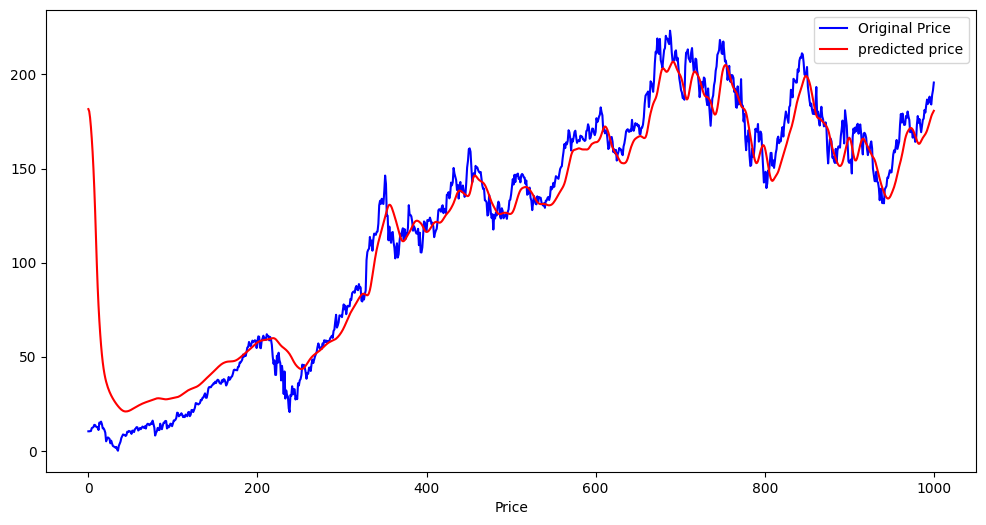

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predict, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()

In [34]:
# Load the trained model
from keras.models import load_model

model = load_model('keras_model.h5')

# Get the last 100 days of historical data from the testing dataset
last_100_days = data_testing[-100:].values

# Scale the data
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list to store the predicted prices
predicted_prices = []

# Make predictions for the next day using the last 100 days of data
for i in range(1):
    X_test = np.array([last_100_days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_price = model.predict(X_test)
    predicted_prices.append(predicted_price)
    last_100_days_scaled = np.append(last_100_days_scaled, predicted_price)
    last_100_days_scaled = np.delete(last_100_days_scaled, 0)

# Invert the scaling of the predicted price
predicted_prices = np.array(predicted_prices)
predicted_prices = predicted_prices.reshape(predicted_prices.shape[0],predicted_prices.shape[2])
predicted_prices = scaler.inverse_transform(predicted_prices)

print('Predicted price for the next day:', predicted_prices[0][0])


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 1s/step
Predicted price for the next day: 156.128


In [34]:
# # Load the trained model
# from keras.models import load_model

# model = load_model('keras_model.h5')

# # Get the last 100 days of historical data from the testing dataset
# last_100_days = data_testing[-100:].values

# # Scale the data
# last_100_days_scaled = scaler.transform(last_100_days)

# # Ask the user for the number of future days to predict
# n_days = int(input('Enter the number of future days to predict: '))

# # Create an empty list to store the predicted prices
# predicted_prices = []

# # Make predictions for the next n days using the last 100 days of data
# for i in range(n_days):
#     X_test = np.array([last_100_days_scaled])
#     X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#     predicted_price = model.predict(X_test)
#     predicted_prices.append(predicted_price)
#     last_100_days_scaled = np.append(last_100_days_scaled, predicted_price)
#     last_100_days_scaled = np.delete(last_100_days_scaled, 0)

# # Invert the scaling of the predicted prices
# predicted_prices = np.array(predicted_prices)
# predicted_prices = predicted_prices.reshape(predicted_prices.shape[0],predicted_prices.shape[2])
# predicted_prices = scaler.inverse_transform(predicted_prices)

# # Plot the predicted prices
# plt.figure(figsize=(12,6))
# plt.plot(data_testing.index[-100:], data_testing['Close'].tail(100), label='Historical prices')
# plt.plot(pd.date_range(start=data_testing.index[-1], periods=n_days+1, freq='D')[1:], predicted_prices, label='Predicted prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


Enter the number of days for future prediction: 30
1/1 [==============================] - 0s 86ms/step


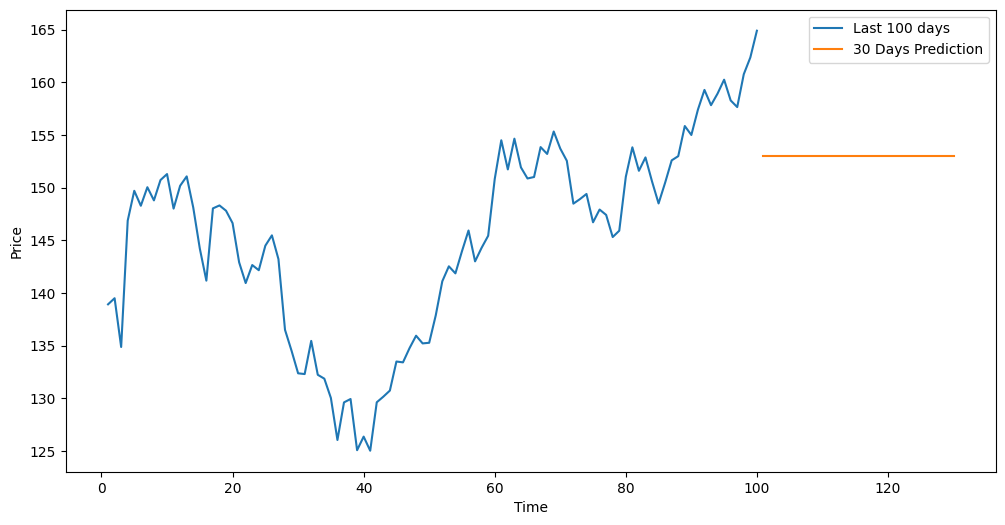

In [40]:
# # Make future predictions
# n_future_days = int(input("Enter the number of days for future prediction: "))
# x_input = input_data[-100:]
# temp_input = list(x_input)
# temp_input = temp_input[0].tolist()

# # demonstrate prediction for next n days
# lst_output = []
# n_steps = 100
# i = 0
# while i < n_future_days:
#     if len(temp_input) > 100:
#         x_input = np.array(temp_input[1:])
#         x_input = x_input.reshape(1, -1)
#         x_input = scaler.transform(x_input)
#         yhat = model.predict(x_input.reshape(1, n_steps, 1))
#         temp_input.append(yhat[0, 0])
#         temp_input = temp_input[1:]
#         lst_output.append(yhat[0, 0])
#         i += 1
#     else:
#         x_input = x_input.reshape(1, n_steps, 1)
#         yhat = model.predict(x_input)
#         temp_input.append(yhat[0, 0])
#         lst_output.append(yhat[0, 0])
#         i += 1

# day_new = np.arange(1, 101)
# day_pred = np.arange(101, 101 + n_future_days)

# # Plot future predictions along with previous predictions
# plt.figure(figsize=(12,6))
# plt.plot(day_new, scaler.inverse_transform(input_data[-100:]), label='Last 100 days')
# plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)), label=f'{n_future_days} Days Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()
